<a href="https://colab.research.google.com/github/gkdivya/EVA/blob/main/11_YOLO/Custom_YoloV3_Training/YoloV3_CustomData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Download the repo

In [ ]:
#!git clone https://github.com/theschoolofai/YoloV3.git /content/drive/MyDrive/YoloV3_Custom_Data/YoloV3

Cloning into '/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 12.74 MiB | 12.95 MiB/s, done.
Resolving deltas: 100% (7/7), done.
Checking out files: 100% (127/127), done.


In [ ]:
#!unzip /content/drive/MyDrive/customdata.zip -d /content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/data

In [2]:
!ls  /content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/data/customdata/

custom.data  custom.names   custom.txt	labels	     test.txt	   train.txt
custom.gdoc  custom.shapes  images	test.shapes  train.shapes


In [3]:
!cat /content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/data/customdata/train.txt | tail -2

./data/customdata/images/8.jpg
./data/customdata/images/9.jpg

## Config file for custom dataset

In [4]:
!cat /content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/data/customdata/custom.data

classes=4
train=data/customdata/train.txt
valid=data/customdata/test.txt
names=data/customdata/custom.names

## Import libraries

In [5]:
import time
import glob
import torch
import os
import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.9.0+cu102 _CudaDeviceProperties(name='Tesla V100-SXM2-16GB', major=7, minor=0, total_memory=16160MB, multi_processor_count=80)


In [6]:
%cd /content/drive/MyDrive/YoloV3_Custom_Data/YoloV3

/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3


## Test the pipeline by training on small coco dataset

In [ ]:
!python train.py --data data/smalcoco/smalcoco.data --batch 10 --cache --epochs 3 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2021-07-21 23:18:41.643547: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:04<00:00,  4.47it/s]
Caching images (0.0GB): 100% 20/20 [00:06<00:00,  3.29it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 9

## Train for 300 epochs using custom dataset

In [ ]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2021-07-21 23:20:57.439887: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (3126 found, 131 missing, 38 empty, 0 duplicate, for 3295 images): 100% 3295/3295 [12:43<00:00,  4.32it/s]
Caching images (1.8GB): 100% 3295/3295 [15:14<00:00,  3.60it/s]
Caching labels (305 found, 14 missing, 7 empty, 0 duplicate, for 326 images): 10

## Predict on images to detect classes

In [7]:
!python detect.py --conf-thres 0.3 --source "/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/images" --output output

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='output', save_txt=False, source='/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-SXM2-16GB', total_memory=16160MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
image 1/16 /content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/images/image-01.jpg

## Prediction on video file

In [8]:
!python detect.py --conf-thres 0.3 --source "/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/data/video_clip1.mp4" --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/data/video_clip1.mp4', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-SXM2-16GB', total_memory=16160MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
video 1/1 (1/2664) /content/drive/MyDrive/YoloV3_Custom_Data/Yol

## Predictions for Hardhat, Masks, Vest and Boots

In [9]:
w=500

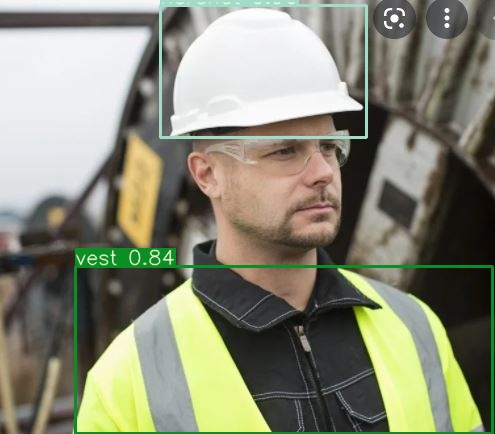

In [10]:
Image(filename='/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/output/image-01.jpg', width=w)

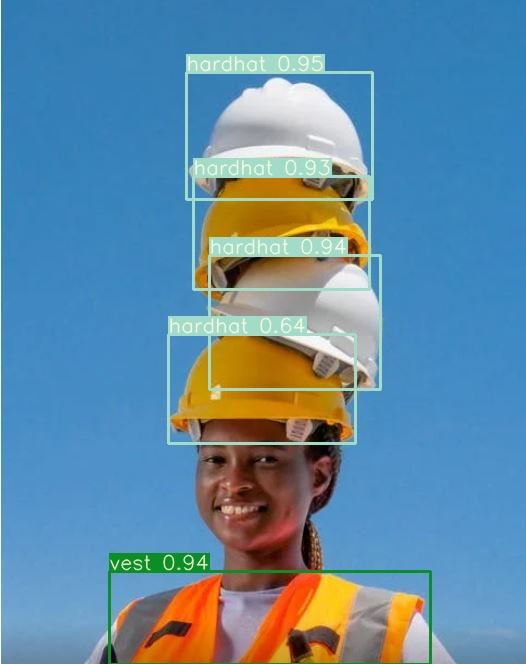

In [11]:
Image(filename='/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/output/image-02.jpg', width=w)

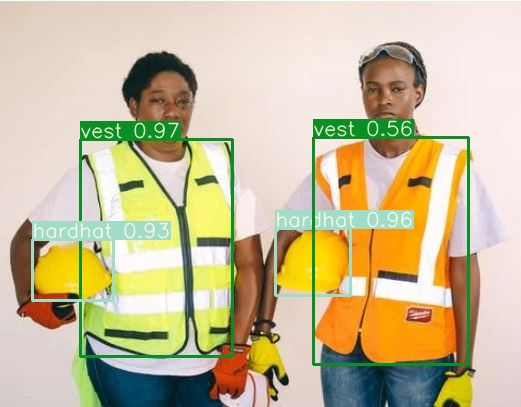

In [12]:
Image(filename='/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/output/image-03.jpg', width=w)

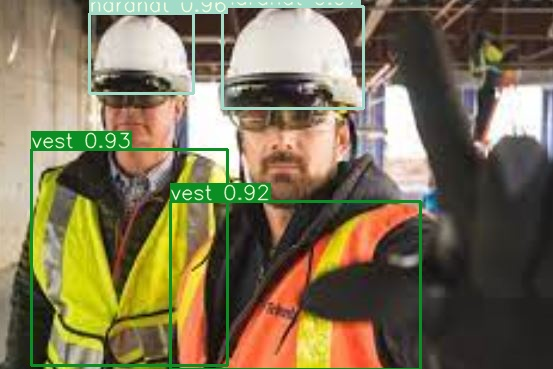

In [13]:
Image(filename='/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/output/image-04.jpg', width=w)

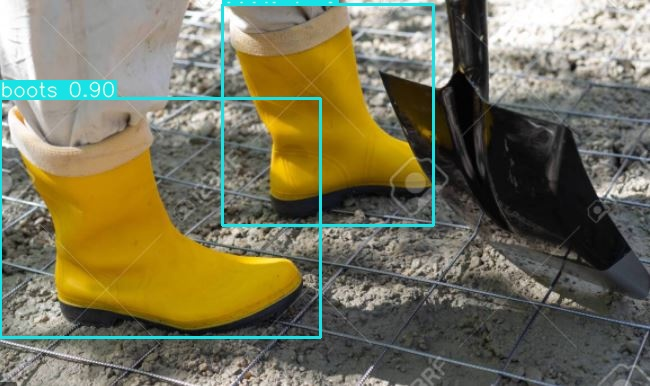

In [14]:
Image(filename='/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/output/image-05.jpg', width=w)

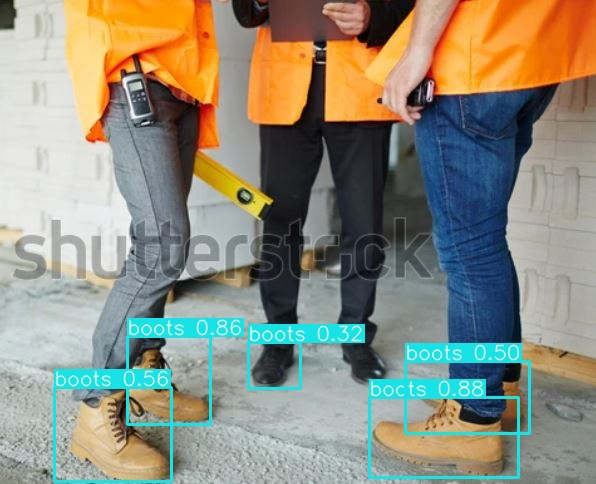

In [15]:
Image(filename='/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/output/image-06.jpg', width=w)

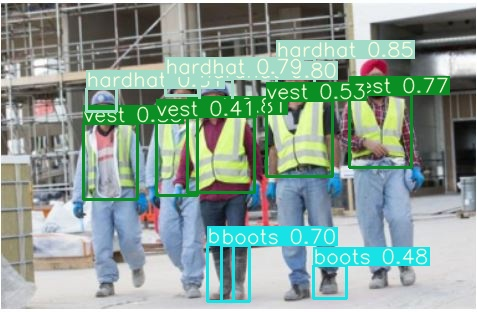

In [17]:
Image(filename='/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/output/image-08.jpg', width=w)

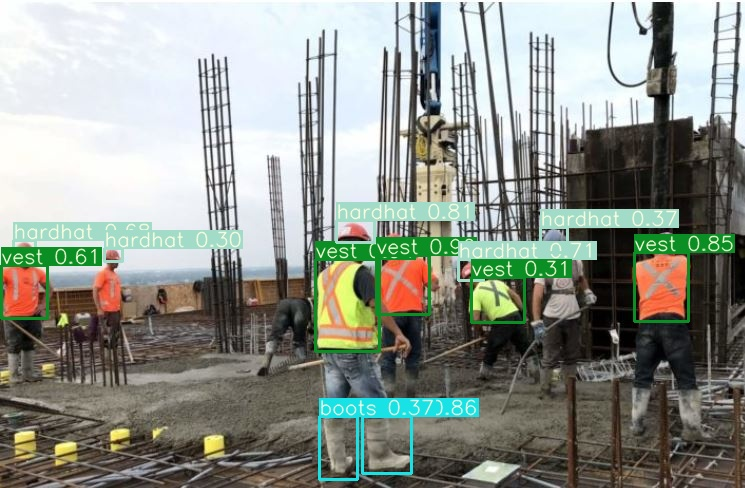

In [18]:
Image(filename='/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/output/image-09.jpg', width=w)

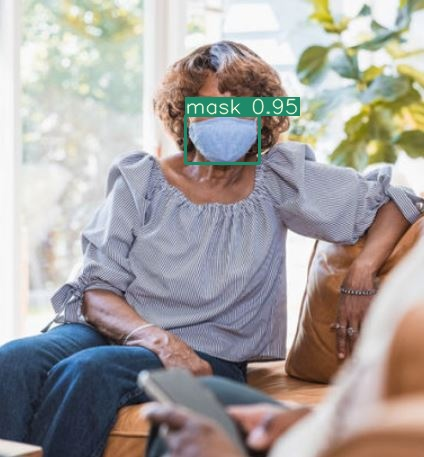

In [19]:
Image(filename='/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/output/image-10.jpg', width=w)

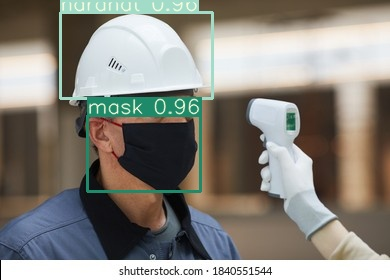

In [20]:
Image(filename='/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/output/image-11.jpg', width=w)

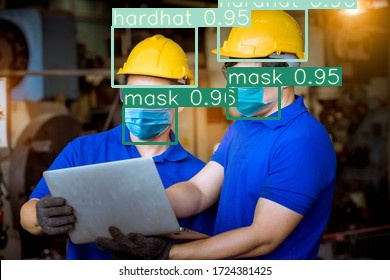

In [21]:
Image(filename='/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/output/image-12.jpg', width=w)

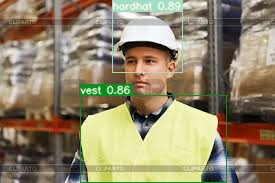

In [22]:
Image(filename='/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/output/image-13.jpg', width=w)

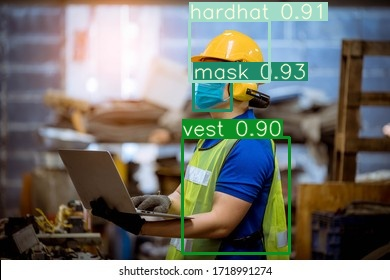

In [23]:
Image(filename='/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/output/image-14.jpg', width=w)

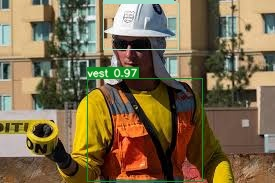

In [24]:
Image(filename='/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/output/image-15.jpg', width=w)

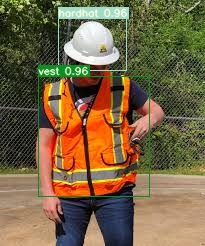

In [25]:
Image(filename='/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/output/image-16.jpg', width=w)